In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [9]:
import pandas as pd

# Try different encodings if 'utf-8' fails
try:
    pbj_df = pd.read_csv(r"C:\Users\oscar\Downloads\PBJ_Daily_Nurse_Staffing_Q1_2024\PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='latin1')
except UnicodeDecodeError:
    pbj_df = pd.read_csv(r"C:\Users\oscar\Downloads\PBJ_Daily_Nurse_Staffing_Q1_2024\PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='cp1252')

C:\Users\oscar\AppData\Local\Temp\ipykernel_12904\2625096715.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  pbj_df = pd.read_csv(r"C:\Users\oscar\Downloads\PBJ_Daily_Nurse_Staffing_Q1_2024\PBJ_Daily_Nurse_Staffing_Q1_2024.csv", encoding='latin1')


In [10]:
pbj_df.head()

,ï»¿PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
0,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240101,50,8.0,...,0.0,156.34,156.34,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240102,49,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240103,49,8.0,...,0.0,147.15,147.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240104,50,8.0,...,0.0,142.21,142.21,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15009,"BURNS NURSING HOME, INC.",RUSSELLVILLE,AL,Franklin,59,2024Q1,20240105,51,8.0,...,0.0,149.40,149.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
pbj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330966 entries, 0 to 1330965
Data columns (total 33 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   ï»¿PROVNUM        1330966 non-null  object 
 1   PROVNAME          1330966 non-null  object 
 2   CITY              1330966 non-null  object 
 3   STATE             1330966 non-null  object 
 4   COUNTY_NAME       1330966 non-null  object 
 5   COUNTY_FIPS       1330966 non-null  int64  
 6   CY_Qtr            1330966 non-null  object 
 7   WorkDate          1330966 non-null  int64  
 8   MDScensus         1330966 non-null  int64  
 9   Hrs_RNDON         1330966 non-null  float64
 10  Hrs_RNDON_emp     1330966 non-null  float64
 11  Hrs_RNDON_ctr     1330966 non-null  float64
 12  Hrs_RNadmin       1330966 non-null  float64
 13  Hrs_RNadmin_emp   1330966 non-null  float64
 14  Hrs_RNadmin_ctr   1330966 non-null  float64
 15  Hrs_RN            1330966 non-null  float64
 16  

In [14]:
pbj_df = pbj_df.rename(columns={"ï»¿PROVNUM": "PROVNUM"})

In [15]:
pbj_df.describe(include='all')

,PROVNUM,PROVNAME,CITY,STATE,COUNTY_NAME,COUNTY_FIPS,CY_Qtr,WorkDate,MDScensus,Hrs_RNDON,...,Hrs_LPN_ctr,Hrs_CNA,Hrs_CNA_emp,Hrs_CNA_ctr,Hrs_NAtrn,Hrs_NAtrn_emp,Hrs_NAtrn_ctr,Hrs_MedAide,Hrs_MedAide_emp,Hrs_MedAide_ctr
count,1330966.0,1330966,1330966,1330966,1330966,1.330966e+06,1330966,1.330966e+06,1.330966e+06,1.330966e+06,...,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06,1.330966e+06
unique,14658.0,14441,5092,52,1671,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,15009.0,MILLER'S MERRY MANOR,CHICAGO,TX,Los Angeles,NaN,2024Q1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,91.0,1092,7098,105924,33124,NaN,1330966,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,9.110645e+01,NaN,2.024022e+07,8.342205e+01,5.202604e+00,...,6.471522e+00,1.711519e+02,1.581772e+02,1.297474e+01,4.245751e+00,4.183379e+00,6.237254e-02,8.479371e+00,8.256561e+00,2.228107e-01
std,NaN,NaN,NaN,NaN,NaN,9.920207e+01,NaN,8.300736e+01,4.913768e+01,4.548220e+00,...,1.616055e+01,1.137098e+02,1.062863e+02,3.255127e+01,1.310614e+01,1.274111e+01,2.106869e+00,1.760569e+01,1.720677e+01,2.190094e+00
min,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,2.024010e+07,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,3.100000e+01,NaN,2.024012e+07,5.100000e+01,0.000000e+00,...,0.000000e+00,9.697000e+01,8.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,6.900000e+01,NaN,2.024022e+07,7.600000e+01,8.000000e+00,...,0.000000e+00,1.481000e+02,1.367500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.170000e+02,NaN,2.024031e+07,1.040000e+02,8.000000e+00,...,5.800000e+00,2.169500e+02,2.030600e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.125000e+01,1.075000e+01,0.000000e+00


In [59]:
pbj_df.columns

Index(['PROVNUM', 'PROVNAME', 'CITY', 'STATE', 'COUNTY_NAME', 'COUNTY_FIPS',
       'CY_Qtr', 'WorkDate', 'MDScensus', 'Hrs_RNDON', 'Hrs_RNDON_emp',
       'Hrs_RNDON_ctr', 'Hrs_RNadmin', 'Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr',
       'Hrs_RN', 'Hrs_RN_emp', 'Hrs_RN_ctr', 'Hrs_LPNadmin',
       'Hrs_LPNadmin_emp', 'Hrs_LPNadmin_ctr', 'Hrs_LPN', 'Hrs_LPN_emp',
       'Hrs_LPN_ctr', 'Hrs_CNA', 'Hrs_CNA_emp', 'Hrs_CNA_ctr', 'Hrs_NAtrn',
       'Hrs_NAtrn_emp', 'Hrs_NAtrn_ctr', 'Hrs_MedAide', 'Hrs_MedAide_emp',
       'Hrs_MedAide_ctr'],
      dtype='object')

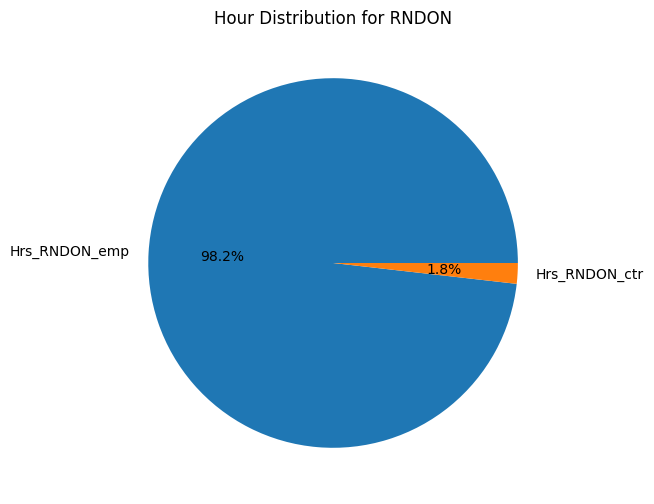

In [60]:
hrs_rn = pbj_df[['Hrs_RNDON_emp', 'Hrs_RNDON_ctr']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(hrs_rn, labels=hrs_rn.index, autopct='%1.1f%%')
plt.title('Hour Distribution for RNDON')
plt.show()

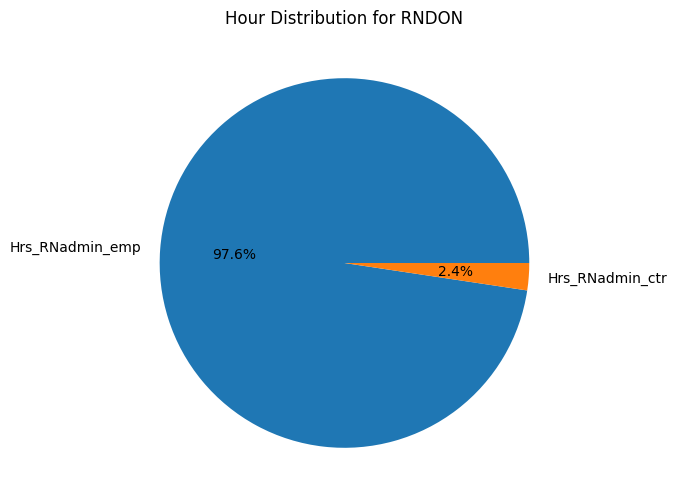

In [61]:
hrs_rn = pbj_df[['Hrs_RNadmin_emp', 'Hrs_RNadmin_ctr']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(hrs_rn, labels=hrs_rn.index, autopct='%1.1f%%')
plt.title('Hour Distribution for RNDON')
plt.show()

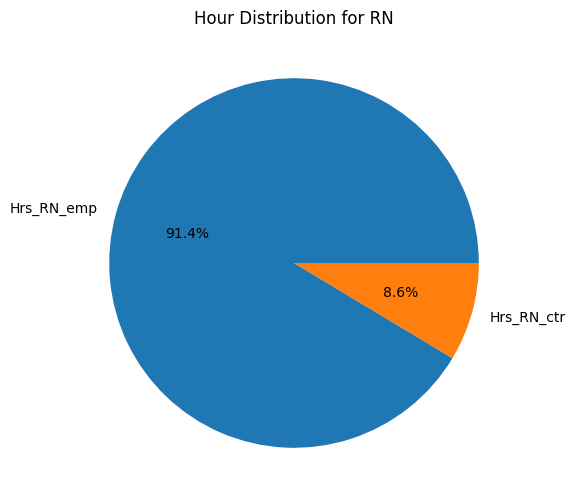

In [21]:
hrs_rn = pbj_df[['Hrs_RN_emp', 'Hrs_RN_ctr']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(hrs_rn, labels=hrs_rn.index, autopct='%1.1f%%')
plt.title('Hour Distribution for RN')
plt.show()

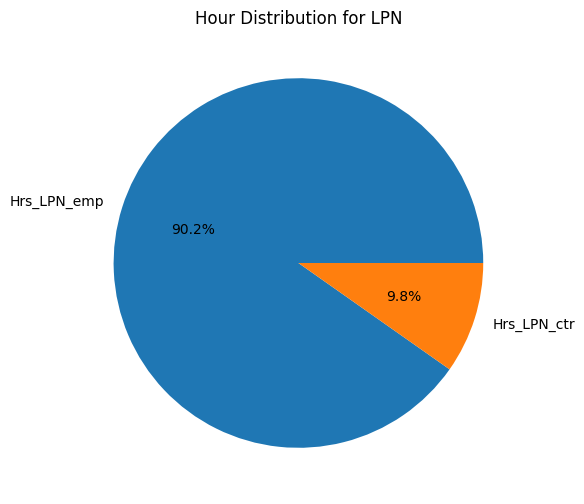

In [22]:
hrs_lpn = pbj_df[['Hrs_LPN_emp', 'Hrs_LPN_ctr']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(hrs_lpn, labels=hrs_lpn.index, autopct='%1.1f%%')
plt.title('Hour Distribution for LPN')
plt.show()

LPN has the highest percentage of contractor rate

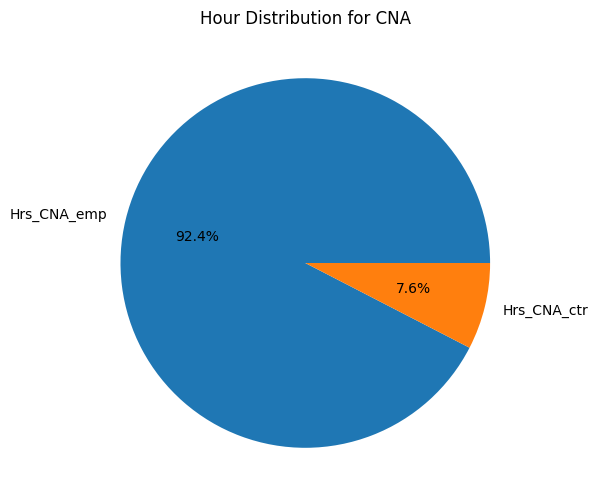

In [32]:
hrs_cna = pbj_df[['Hrs_CNA_emp', 'Hrs_CNA_ctr']].sum()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(hrs_cna, labels=hrs_cna.index, autopct='%1.1f%%')
plt.title('Hour Distribution for CNA')
plt.show()

In [38]:
total_Hrs_RN_ctr_by_state = pbj_df.groupby('STATE').agg({
    'Hrs_RN_ctr': 'sum'
}).reset_index()

total_Hrs_RN_ctr_by_state = total_Hrs_RN_ctr_by_state.sort_values(by='Hrs_RN_ctr', ascending=False)

total_Hrs_RN_ctr_by_state_10 = total_Hrs_RN_ctr_by_state.head(10)

total_Hrs_RN_ctr_by_state_10

,STATE,Hrs_RN_ctr
34,NY,776877.65
38,PA,411631.05
14,IL,369883.16
19,MA,206252.58
31,NJ,176665.18
20,MD,159488.23
35,OH,135424.59
23,MN,121191.99
9,FL,107717.77
49,WI,100991.71


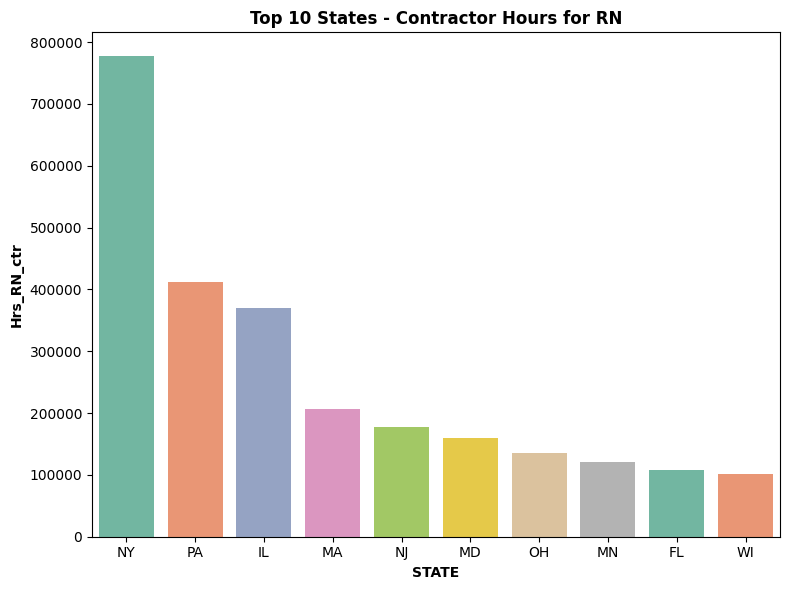

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='STATE', y='Hrs_RN_ctr', data=total_Hrs_RN_ctr_by_state_10, palette='Set2')

# Add labels and title
plt.xlabel('STATE', fontweight='bold')
plt.ylabel('Hrs_RN_ctr', fontweight='bold')
plt.title('Top 10 States - Contractor Hours for RN', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
total_Hrs_LPN_ctr_by_country = pbj_df.groupby('STATE').agg({
    'Hrs_LPN_ctr': 'sum'
}).reset_index()

total_Hrs_LPN_ctr_by_country = total_Hrs_LPN_ctr_by_country.sort_values(by='Hrs_LPN_ctr', ascending=False)

total_Hrs_LPN_ctr_by_country_10 = total_Hrs_LPN_ctr_by_country.head(10)

total_Hrs_LPN_ctr_by_country_10

,STATE,Hrs_LPN_ctr
34,NY,1216464.72
38,PA,1107096.05
31,NJ,502039.89
35,OH,372453.16
27,NC,371391.42
19,MA,363958.49
14,IL,318700.45
44,TX,314968.00
4,CA,289389.01
9,FL,280548.37


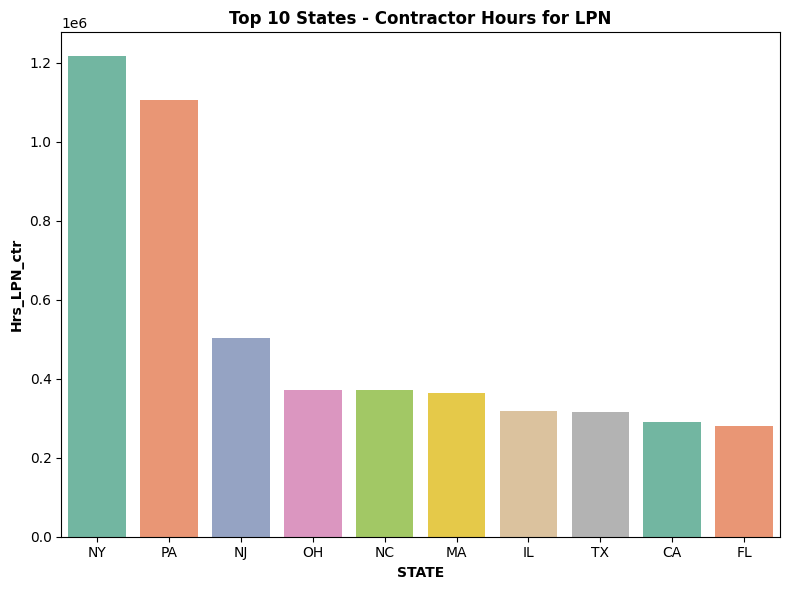

In [43]:
plt.figure(figsize=(8, 6))
sns.barplot(x='STATE', y='Hrs_LPN_ctr', data=total_Hrs_LPN_ctr_by_country_10, palette='Set2')

# Add labels and title
plt.xlabel('STATE', fontweight='bold')
plt.ylabel('Hrs_LPN_ctr', fontweight='bold')
plt.title('Top 10 States - Contractor Hours for LPN', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [67]:
total_Hrs_CNA_ctr_by_country = pbj_df.groupby('STATE').agg({
    'Hrs_CNA_ctr': 'sum'
}).reset_index()

total_Hrs_CNA_ctr_by_country_a = total_Hrs_CNA_ctr_by_country.sort_values(by='Hrs_CNA_ctr', ascending=True)

total_Hrs_CNA_ctr_by_country_10a = total_Hrs_CNA_ctr_by_country_a.head(10)

total_Hrs_CNA_ctr_by_country_10a

,STATE,Hrs_CNA_ctr
39,PR,0.00
51,WY,19598.18
0,AK,26283.15
13,ID,30790.84
7,DC,37050.49
33,NV,39442.96
32,NM,39559.92
1,AL,49559.86
2,AR,53378.85
11,HI,56867.11


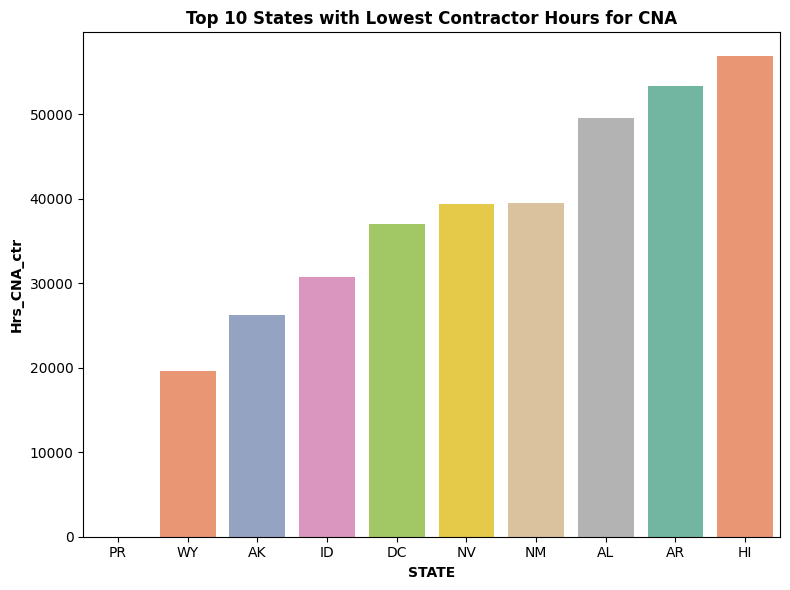

In [69]:
plt.figure(figsize=(8, 6))
sns.barplot(x='STATE', y='Hrs_CNA_ctr', data=total_Hrs_CNA_ctr_by_country_10a, palette='Set2')

# Add labels and title
plt.xlabel('STATE', fontweight='bold')
plt.ylabel('Hrs_CNA_ctr', fontweight='bold')
plt.title('Top 10 States with Lowest Contractor Hours for CNA', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [44]:
total_Hrs_CNA_ctr_by_country = pbj_df.groupby('STATE').agg({
    'Hrs_CNA_ctr': 'sum'
}).reset_index()

total_Hrs_CNA_ctr_by_country = total_Hrs_CNA_ctr_by_country.sort_values(by='Hrs_CNA_ctr', ascending=False)

total_Hrs_CNA_ctr_by_country_10 = total_Hrs_CNA_ctr_by_country.head(10)

total_Hrs_CNA_ctr_by_country_10

,STATE,Hrs_CNA_ctr
38,PA,2024098.00
34,NY,1924905.03
31,NJ,1313177.45
4,CA,949042.36
14,IL,844819.19
35,OH,753797.23
27,NC,636250.60
44,TX,609217.89
19,MA,503215.53
20,MD,488745.01


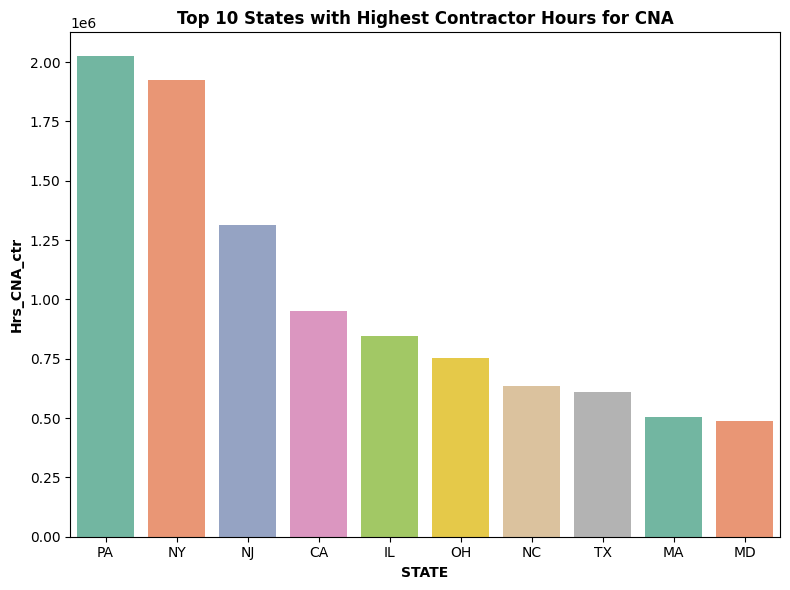

In [70]:
plt.figure(figsize=(8, 6))
sns.barplot(x='STATE', y='Hrs_CNA_ctr', data=total_Hrs_CNA_ctr_by_country_10, palette='Set2')

# Add labels and title
plt.xlabel('STATE', fontweight='bold')
plt.ylabel('Hrs_CNA_ctr', fontweight='bold')
plt.title('Top 10 States with Highest Contractor Hours for CNA', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

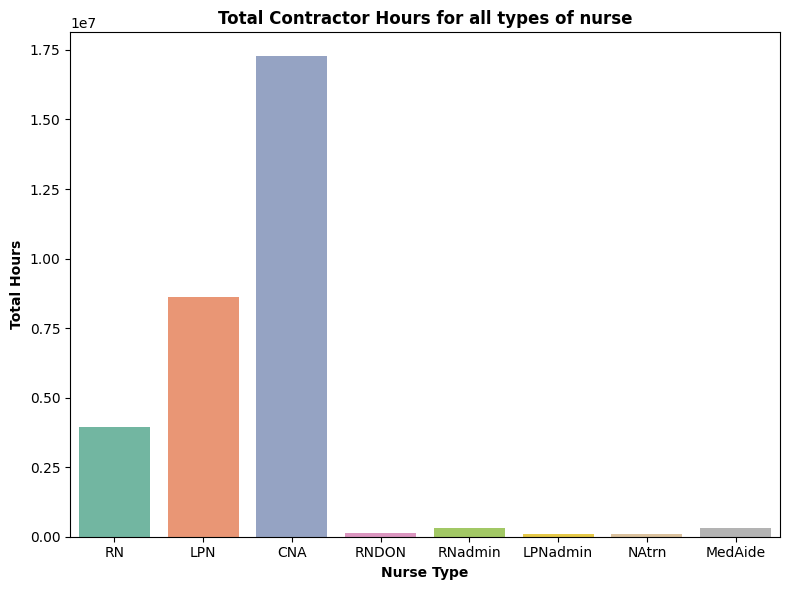

In [47]:
total_hours = {
    'Nurse_Type': ['RN', 'LPN', 'CNA', 'RNDON', 'RNadmin', 'LPNadmin', 'NAtrn', 'MedAide'],
    'Total_Hours': [pbj_df['Hrs_RN_ctr'].sum(), pbj_df['Hrs_LPN_ctr'].sum(), pbj_df['Hrs_CNA_ctr'].sum(), pbj_df['Hrs_RNDON_ctr'].sum(), pbj_df['Hrs_RNadmin_ctr'].sum(), pbj_df['Hrs_LPNadmin_ctr'].sum(), pbj_df['Hrs_NAtrn_ctr'].sum(), pbj_df['Hrs_MedAide_ctr'].sum()]
}

total_hours_df = pd.DataFrame(total_hours)

# Step 3: Create the bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Nurse_Type', y='Total_Hours', data=total_hours_df, palette='Set2')

# Add labels and title
plt.xlabel('Nurse Type', fontweight='bold')
plt.ylabel('Total Hours', fontweight='bold')
plt.title('Total Contractor Hours for all types of nurse', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
try:
    statusavg_df = pd.read_csv(r"C:\Users\oscar\Downloads\NH_StateUSAverages_Aug2024.csv", encoding='latin1')
except UnicodeDecodeError:
    statusavg_df = pd.read_csv(r"C:\Users\oscar\Downloads\NH_StateUSAverages_Aug2024.csv", encoding='cp1252')

In [50]:
statusavg_df.head()

,State or Nation,Cycle 1 Total Number of Health Deficiencies,Cycle 1 Total Number of Fire Safety Deficiencies,Cycle 2 Total Number of Health Deficiencies,Cycle 2 Total Number of Fire Safety Deficiencies,Cycle 3 Total Number of Health Deficiencies,Cycle 3 Total Number of Fire Safety Deficiencies,Average Number of Residents per Day,Reported Nurse Aide Staffing Hours per Resident per Day,Reported LPN Staffing Hours per Resident per Day,...,Percentage of long stay residents who received an antianxiety or hypnotic medication,Percentage of high risk long stay residents with pressure ulcers,Percentage of long stay residents assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who made improvements in function,Percentage of short stay residents who were assessed and appropriately given the seasonal influenza vaccine,Percentage of short stay residents who were rehospitalized after a nursing home admission,Percentage of short stay residents who had an outpatient emergency department visit,Number of hospitalizations per 1000 long-stay resident days,Number of outpatient emergency department visits per 1000 long-stay resident days,Processing Date
0,NATION,9.6,4.8,9.0,4.4,8.4,4.3,83.0,2.26,0.88,...,19.688334,7.845186,94.852269,76.758292,77.028714,21.473024,11.590195,1.652838,1.652320,2024-08-01
1,AK,7.4,5.0,8.1,7.0,8.3,7.1,36.3,4.36,0.78,...,15.268783,8.928272,98.033410,80.852506,75.412516,17.521198,12.607531,1.045161,1.548693,2024-08-01
2,AL,3.3,3.3,3.1,3.4,3.8,3.2,95.4,2.40,0.81,...,24.012101,8.577385,94.905096,75.129261,79.261184,22.320326,12.228085,1.768343,1.635922,2024-08-01
3,AR,8.3,2.1,8.6,1.8,8.9,2.0,73.7,2.60,0.97,...,21.942394,8.308777,95.664109,80.465340,71.799106,22.747167,13.187986,1.877522,2.055679,2024-08-01
4,AZ,5.5,2.0,8.2,3.1,6.9,3.2,81.7,2.27,1.08,...,19.807363,8.714844,93.573366,77.989887,85.555286,22.618081,10.606475,1.579370,1.456630,2024-08-01


In [51]:
statusavg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 48 columns):
 #   Column                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                       --------------  -----  
 0   State or Nation                                                                                              54 non-null     object 
 1   Cycle 1 Total Number of Health Deficiencies                                                                  54 non-null     float64
 2   Cycle 1 Total Number of Fire Safety Deficiencies                                                             54 non-null     float64
 3   Cycle 2 Total Number of Health Deficiencies                                                                  54 non-null     float64
 4   Cycle 2 Total Number of Fire Safety Deficiencies                

In [54]:
statusavg_df.columns

Index(['State or Nation', 'Cycle 1 Total Number of Health Deficiencies',
       'Cycle 1 Total Number of Fire Safety Deficiencies',
       'Cycle 2 Total Number of Health Deficiencies',
       'Cycle 2 Total Number of Fire Safety Deficiencies',
       'Cycle 3 Total Number of Health Deficiencies',
       'Cycle 3 Total Number of Fire Safety Deficiencies',
       'Average Number of Residents per Day',
       'Reported Nurse Aide Staffing Hours per Resident per Day',
       'Reported LPN Staffing Hours per Resident per Day',
       'Reported RN Staffing Hours per Resident per Day',
       'Reported Licensed Staffing Hours per Resident per Day',
       'Reported Total Nurse Staffing Hours per Resident per Day',
       'Total number of nurse staff hours per resident per day on the weekend',
       'Registered Nurse hours per resident per day on the weekend',
       'Reported Physical Therapist Staffing Hours per Resident Per Day',
       'Total nursing staff turnover', 'Registered Nurse tu

In [55]:
total_nturnover_by_state = statusavg_df.groupby('State or Nation').agg({
    'Total nursing staff turnover': 'sum'
}).reset_index()

total_nturnover_by_state = total_nturnover_by_state.sort_values(by='Total nursing staff turnover', ascending=False)

total_nturnover_by_state_10 = total_nturnover_by_state.head(10)

total_nturnover_by_state_10

,State or Nation,Total nursing staff turnover
49,VT,61.3
27,MT,61.2
25,MO,58.5
38,OK,57.7
47,UT,57.1
34,NM,55.4
5,CO,55.2
53,WY,54.7
22,ME,53.8
46,TX,53.5


In [56]:
total_rnturnover_by_state = statusavg_df.groupby('State or Nation').agg({
    'Registered Nurse turnover': 'sum'
}).reset_index()

total_rnturnover_by_state = total_rnturnover_by_state.sort_values(by='Registered Nurse turnover', ascending=False)

total_rnturnover_by_state_10 = total_rnturnover_by_state.head(10)

total_rnturnover_by_state_10

,State or Nation,Registered Nurse turnover
34,NM,57.6
25,MO,55.2
38,OK,55.2
27,MT,54.9
46,TX,52.0
5,CO,51.0
48,VA,50.7
39,OR,50.5
9,FL,49.4
50,WA,48.6


In [58]:
total_nhour_by_state = statusavg_df.groupby('State or Nation').agg({
    'Reported Total Nurse Staffing Hours per Resident per Day': 'sum'
}).reset_index()

total_nhour_by_state = total_nhour_by_state.sort_values(by='Reported Total Nurse Staffing Hours per Resident per Day', ascending=False)

total_nhour_by_state_10 = total_nhour_by_state.head(10)

total_nhour_by_state_10

,State or Nation,Reported Total Nurse Staffing Hours per Resident per Day
0,AK,7.23146
39,OR,4.90155
7,DC,4.87392
41,PR,4.75036
12,HI,4.70998
8,DE,4.47287
30,ND,4.39930
4,CA,4.39299
50,WA,4.34337
22,ME,4.32452


In [64]:
# Grouping by 'STATE' and calculating sum for Hrs_CNA_ctr and Hrs_CNA
total_Hrs_CNA_by_country = pbj_df.groupby('STATE').agg({
    'Hrs_CNA_ctr': 'sum',  # Contractor CNA hours
    'Hrs_CNA': 'sum'       # Total CNA hours (contractors + employees)
}).reset_index()

# Adding a new column for the ratio of Hrs_CNA_ctr to Hrs_CNA
total_Hrs_CNA_by_country['Ctr_to_Total_Ratio'] = total_Hrs_CNA_by_country['Hrs_CNA_ctr'] / total_Hrs_CNA_by_country['Hrs_CNA']

# Sorting by Hrs_CNA_ctr in descending order
total_Hrs_CNA_by_country = total_Hrs_CNA_by_country.sort_values(by='Ctr_to_Total_Ratio', ascending=False)

# Selecting top 10 states
total_Hrs_CNA_by_country_10 = total_Hrs_CNA_by_country.head(10)

# Display the result
total_Hrs_CNA_by_country_10

,STATE,Hrs_CNA_ctr,Hrs_CNA,Ctr_to_Total_Ratio
47,VT,170848.95,489293.68,0.349175
21,ME,223399.41,1156310.31,0.193200
30,NH,207305.36,1098415.22,0.188731
31,NJ,1313177.45,7504593.58,0.174983
28,ND,195916.13,1165941.57,0.168033
38,PA,2024098.00,12230468.65,0.165496
26,MT,92142.07,645318.52,0.142785
37,OR,230941.79,1734789.16,0.133124
0,AK,26283.15,208077.59,0.126314
20,MD,488745.01,3981029.96,0.122768


In [71]:
try:
    ProviderInfo_df = pd.read_csv(r"C:\Users\oscar\Downloads\NH_ProviderInfo_Aug2024.csv", encoding='latin1')
except UnicodeDecodeError:
    ProviderInfo_df = pd.read_csv(r"C:\Users\oscar\Downloads\NH_ProviderInfo_Aug2024.csv", encoding='cp1252')

In [72]:
ProviderInfo_df.head() 

,CMS Certification Number (CCN),Provider Name,Provider Address,City/Town,State,ZIP Code,Telephone Number,Provider SSA County Code,County/Parish,Ownership Type,...,Number of Citations from Infection Control Inspections,Number of Fines,Total Amount of Fines in Dollars,Number of Payment Denials,Total Number of Penalties,Location,Latitude,Longitude,Geocoding Footnote,Processing Date
0,015009,"BURNS NURSING HOME, INC.",701 MONROE STREET NW,RUSSELLVILLE,AL,35653,2563324110,290,Franklin,For profit - Corporation,...,NaN,2,24644.14,0,2,"701 MONROE STREET NW,RUSSELLVILLE,AL,35653",34.5149,-87.736,NaN,2024-08-01
1,015010,COOSA VALLEY HEALTHCARE CENTER,260 WEST WALNUT STREET,SYLACAUGA,AL,35150,2562495604,600,Talladega,For profit - Corporation,...,0.0,0,0.00,0,0,"260 WEST WALNUT STREET,SYLACAUGA,AL,35150",33.1637,-86.254,NaN,2024-08-01
2,015012,HIGHLANDS HEALTH AND REHAB,380 WOODS COVE ROAD,SCOTTSBORO,AL,35768,2562183708,350,Jackson,Government - County,...,NaN,0,0.00,0,0,"380 WOODS COVE ROAD,SCOTTSBORO,AL,35768",34.6611,-86.047,NaN,2024-08-01
3,015014,EASTVIEW REHABILITATION & HEALTHCARE CENTER,7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206,2058330146,360,Jefferson,For profit - Individual,...,0.0,0,0.00,0,0,"7755 FOURTH AVENUE SOUTH,BIRMINGHAM,AL,35206",33.5595,-86.722,NaN,2024-08-01
4,015015,PLANTATION MANOR NURSING HOME,6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111,2054776161,360,Jefferson,For profit - Individual,...,NaN,0,0.00,0,0,"6450 OLD TUSCALOOSA HIGHWAY,MC CALLA,AL,35111",33.3221,-87.034,NaN,2024-08-01


In [76]:
ProviderInfo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Columns: 103 entries, CMS Certification Number (CCN) to Processing Date
dtypes: float64(49), int64(9), object(45)
memory usage: 11.7+ MB


In [77]:
# Grouping by 'STATE' and calculating sum for Hrs_CNA_ctr and Hrs_CNA
provider_hr = ProviderInfo_df.groupby('Provider Name').agg({
    'Reported Total Nurse Staffing Hours per Resident per Day': 'sum'
}).reset_index()

# Sorting by Hrs_CNA_ctr in descending order
provider_hr = provider_hr.sort_values(by='Reported Total Nurse Staffing Hours per Resident per Day', ascending=False)

# Selecting top 10 states
provider_hr_10 = provider_hr.head(10)

# Display the result
provider_hr_10

,Provider Name,Reported Total Nurse Staffing Hours per Resident per Day
8258,MILLER'S MERRY MANOR,45.36182
7315,LITTLE SISTERS OF THE POOR,27.37916
6331,JEANNE JUGAN RESIDENCE,18.19527
9542,PARKVIEW CARE CENTER,17.44715
6446,KAISER PERMANENTE POST-ACUTE CARE CENTER,15.66370
2604,CHARTER HOUSE INC,15.60483
2716,CHRISTIAN CARE NURSING CENTER,15.44760
8655,NEURORESTORATIVE,15.30766
1616,BETHESDA HOME,12.71265
14594,YAKIMA VALLEY SCHOOL,12.67701


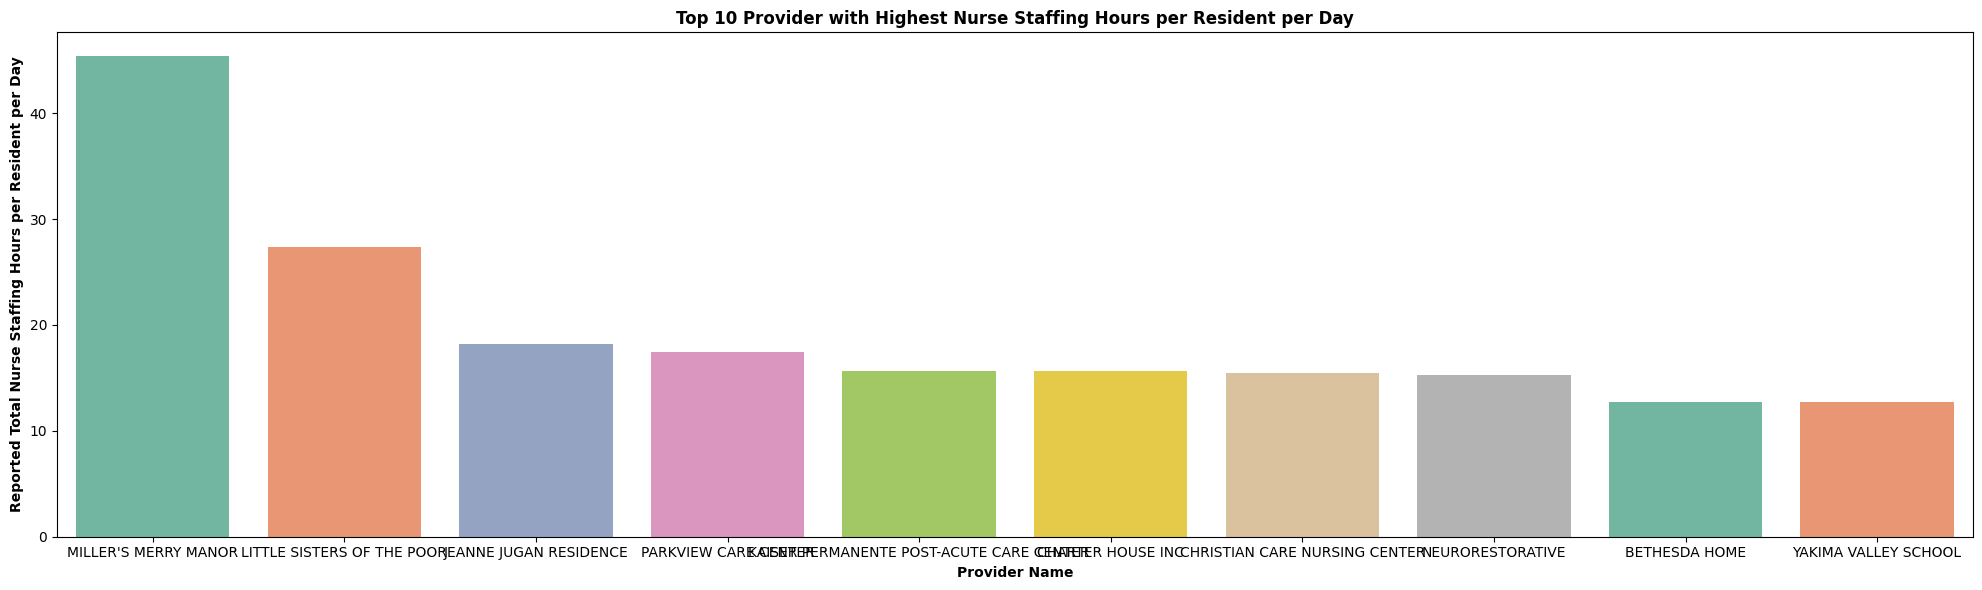

In [85]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Provider Name', y='Reported Total Nurse Staffing Hours per Resident per Day', data=provider_hr_10, palette='Set2')

# Add labels and title
plt.xlabel('Provider Name', fontweight='bold')
plt.ylabel('Reported Total Nurse Staffing Hours per Resident per Day', fontweight='bold')
plt.title('Top 10 Provider with Highest Nurse Staffing Hours per Resident per Day', fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()